In [3]:
# tato úloha bude interaktivní
# zapneme si proto podporu vykreslování
# pomocí následujícího *magického* příkazu
%matplotlib inline

# Near Earth Object

V zemském okolí se pohybuje nespočet malých těles pocházejících z bouřlivého období formování Sluneční soustavy. Pojdmě se společně podívat, co všechno o nich dokážeme zjistit z jednoho souboru na internetu. Ten o nich před mnoha lety začali psát ještě skuteční lidé -- sám jsem vám jednoho osobně znal, ale časy jsou zlé i pro Kamila, a tak dnes jejich práci převzali již roboti. Nezbývá než vzdát čest mladým odvážným můžům s výkonnými teleskopy a chabým připojením k internetu. Že jen pomocí pár kouzelných příkazů posílaných přes terminál k vykonání na vzdáleném mainframu. Zvládají již celá desetiletí spravovat tento dokument:

![Mousepad](../screenshots/mousepad_2015-05-17_17-01-23.png)

Začněme tím, že si tento soubor stáhneme na vlastní počítač...

In [3]:
!wget http://www.minorplanetcenter.net/iau/MPCORB/MPCORB.DAT

--2015-05-15 22:34:10--  http://www.minorplanetcenter.net/iau/MPCORB/MPCORB.DAT
Překládám www.minorplanetcenter.net (www.minorplanetcenter.net)… 131.142.195.59
Navazuje se spojení s www.minorplanetcenter.net (www.minorplanetcenter.net)|131.142.195.59|:80… spojeno.
HTTP požadavek odeslán, program čeká na odpověď… 200 OK
Délka: 139263720 (133M) [text/plain]
Ukládám do: „MPCORB.DAT.1“

MPCORB.DAT.1         13%[==>                   ]  18,22M   953KB/s zbývá 87s   ^C


A až se stahování dokončí, tak spočítáme takzvaný *hash*. Pomocí něj může prvák ověřit pravost souboru a druhák zvládne i dohledat jeho historickou verzi v gitovém repozitáři.

In [4]:
!md5sum MPCORB.DAT

28d7d6dfe70d618deefa7d1a4863e0ba  MPCORB.DAT


Než se soubor pokusím bezhlavě zobrazit v textovém editoru, napřed si o něm zjistím základní informace. K tomu poslouží příkaz `wc` jenž dokáže spočítat všechny řádky, slova i jednotlivé znaky v souboru, který mu předám jako parametr.

In [5]:
!wc MPCORB.DAT

   686050  16673479 139261690 MPCORB.DAT


Při pohledu na první číslo okamžitě zpozorním! Téměř **1 000 000** řádků. To bude asi velký soubor našptává mi dobře známý hlas v mé hlavě. Zeptám se tedy svého počítače: "Počítači, jaká je velikost souboru? A řekni mi to prosím v nějakých lidsky srozumitelných jednotkách."

In [1]:
!du -h MPCORB.DAT

133M	MPCORB.DAT


Hmmm, to se na disketu asi nevleze, leda že bych použil kompresi, ale mám já vůbec ještě nějakou disketovou mechaniku? Mno nic, podíváme se na pár prvních řádků souboru. A to právě tolik, kolik se mi jich vleze do okna terminálu.

In [2]:
!head -42 MPCORB.DAT

MINOR PLANET CENTER ORBIT DATABASE (MPCORB)

This file contains published orbital elements for all numbered and unnumbered
multi-opposition minor planets for which it is possible to make reasonable
predictions.  It also includes published elements for recent one-opposition
minor planets and is intended to be complete through the last issued Daily
Orbit Update MPEC.  As such it is intended to be of interest primarily
to astrometric observers.

   Software programs may include this datafile amongst their datasets, as
   long as this header is included (it is acceptable if it is contained
   in a file separate from the actual data) and that proper attribution
   to the Minor Planet Center is given.  Credit to the individual orbit
   computers is implicit by the inclusion of a reference and the name of
   the orbit computer on each orbit record.  Information on how to obtain
   updated copies of the datafile must also be included.

   The work of the individual astrometric observers, witho

Ano, už to vidím, na posledním řádku, číslo 2,76..., to je přece délka velké poloosy prvně objevené planetky Ceres na počátku 19.&nbsp;století, vyjádřená v Astronomických jednotkách. Dodnes vzpomínám na ten den, kdy byla Mezinárodní astronomickou unií slavnotně definována jako 150&nbsp;Mkm.

In [8]:
!tail -n +42 MPCORB.DAT | cut -b 95-104 > a.out

In [6]:
from numpy import loadtxt

In [7]:
data = loadtxt("a.out")

In [8]:
from matplotlib import pyplot as plt

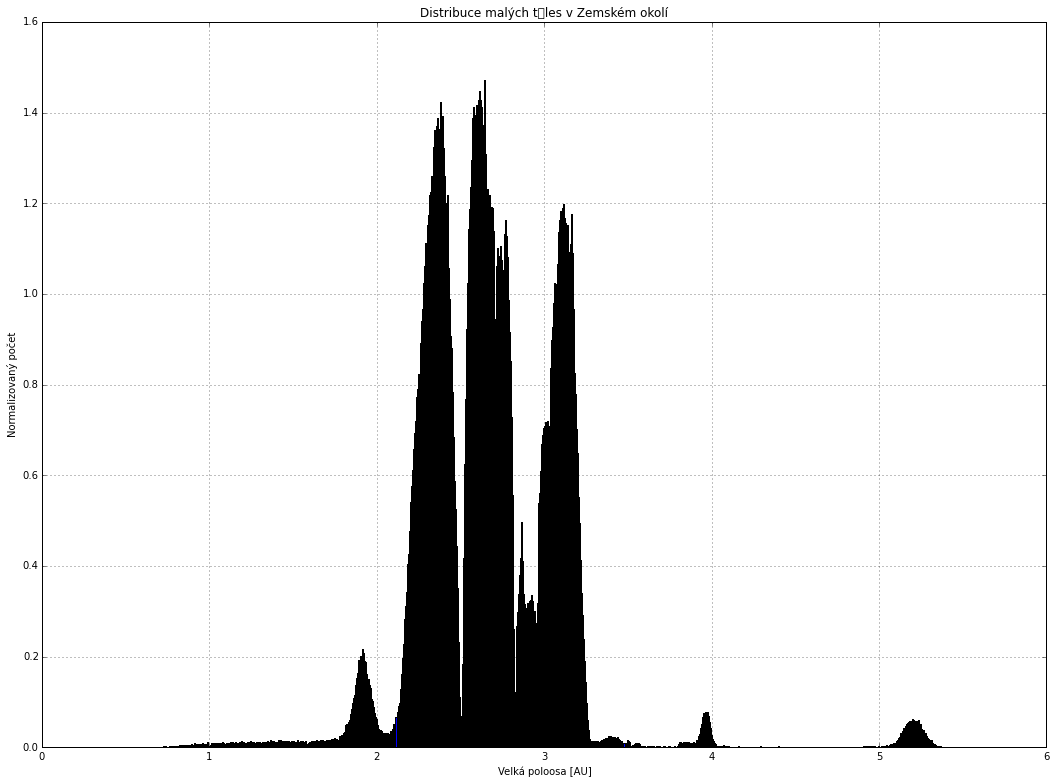

In [9]:
plt.figure(figsize=(18,13))
plt.title("Distribuce malých těles v Zemském okolí")
plt.xlabel("Velká poloosa [AU]")
plt.ylabel("Normalizovaný počet")
plt.grid(True)
n, a, p = plt.hist(data, bins=1000, range=[0, 6], normed=True)

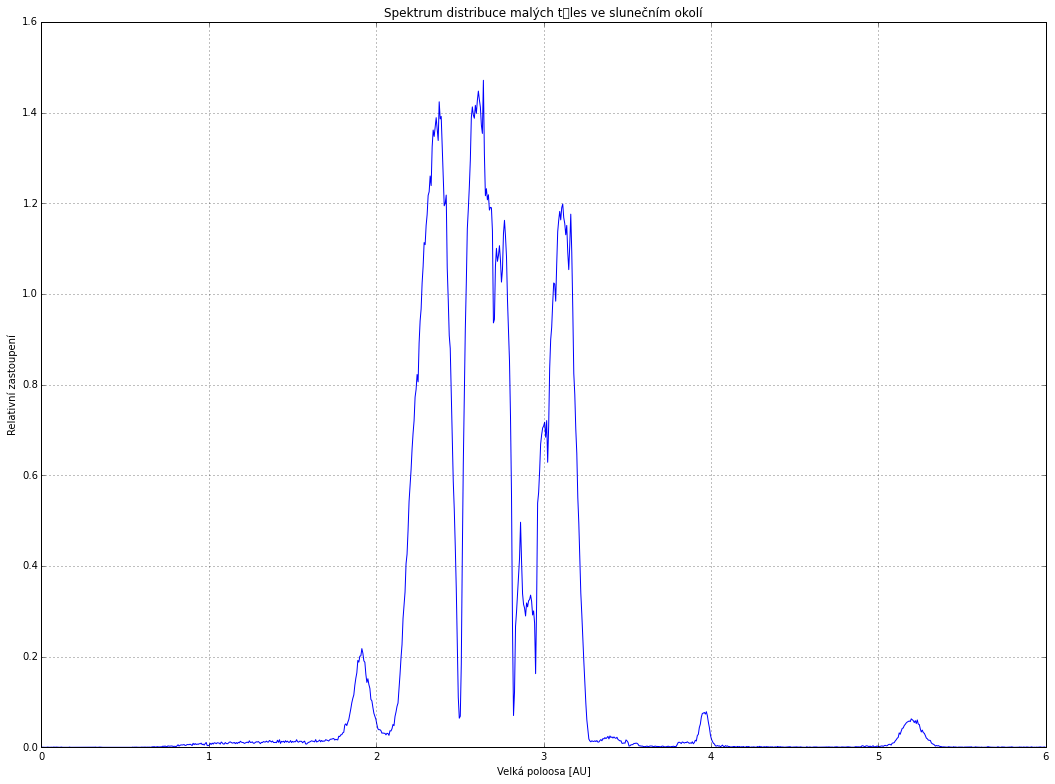

In [43]:
plt.figure(figsize=(18, 13))
plt.title("Spektrum distribuce malých těles ve slunečním okolí")
plt.xlabel("Velká poloosa [AU]")
plt.ylabel("Relativní zastoupení")
plt.grid(True)
plt.plot(a[:-1], n)

In [44]:
import mlpy

In [62]:
%%time
X = mlpy.wavelet.cwt(data, dt=0.1, scales=[1])

CPU times: user 57.3 s, sys: 117 ms, total: 57.4 s
Wall time: 57.7 s


In [65]:
X.size

686007